This is a Codecademy Portfolio Project about Biodiversity in National Parks. 
I will be analyzing two csv files. 

This is what these files contain: 

species_info.csv:
category - class of animal, 
scientific_name - the scientific name of each species, 
common_name - the common names of each species, 
conservation_status - each species’ current conservation status

observations.csv:
scientific_name - the scientific name of each species, 
park_name - Park where species were found, 
observations - the number of times each species was observed at park

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

species_info = pd.read_csv('species_info.csv')
observations = pd.read_csv('observations.csv')

I would like to look into the following: 
What is the distribution of conservation status for animals?
Are certain types of species more likely to be endangered?
Are the differences between species and their conservation status significant?
Which species were spotted the most at each park?

In [9]:
# Describing the data and finding out if it has missing values that need to be dealt with 

print(species_info.describe())
print(species_info.info())

              category    scientific_name        common_names  \
count             5824               5824                5824   
unique               7               5541                5504   
top     Vascular Plant  Castor canadensis  Brachythecium Moss   
freq              4470                  3                   7   

       conservation_status  
count                  191  
unique                   4  
top     Species of Concern  
freq                   161  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB
None


In [10]:
print(observations.describe())
print(observations.info())

       observations
count  23296.000000
mean     142.287904
std       69.890532
min        9.000000
25%       86.000000
50%      124.000000
75%      195.000000
max      321.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None


The data is tidy and ready to be analyzed.

First, I would like to show how many animals in these datasets are threatened by extinction. 

Percentage of Threatened Species: 3.28%
Percentage of Non-Threatened Species: 96.72%


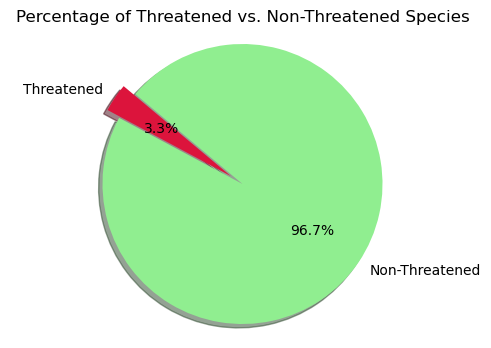

In [90]:
species_info['conservation_status'].replace('Non-Threatened', pd.NA, inplace=True)

# Count the number of threatened and non-threatened species
threatened_count = species_info['conservation_status'].notna().sum()
non_threatened_count = species_info['conservation_status'].isna().sum()

# Calculate percentages
total_species = len(species_info)
percentage_threatened = (threatened_count / total_species) * 100
percentage_non_threatened = (non_threatened_count / total_species) * 100

print(f"Percentage of Threatened Species: {percentage_threatened:.2f}%")
print(f"Percentage of Non-Threatened Species: {percentage_non_threatened:.2f}%")

# Create a pie chart
labels = ['Threatened', 'Non-Threatened']
sizes = [percentage_threatened, percentage_non_threatened]
colors = ['crimson', 'lightgreen']
explode = (0.1, 0)  # explode the first slice (Threatened)

plt.figure(figsize=(6, 4))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Percentage of Threatened vs. Non-Threatened Species')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

1. What is the distribution of conservation status for animals?
   
   To clarify, on this graph I am only including the animals from the 3,3% of the dataset who are threatened by extinction. 

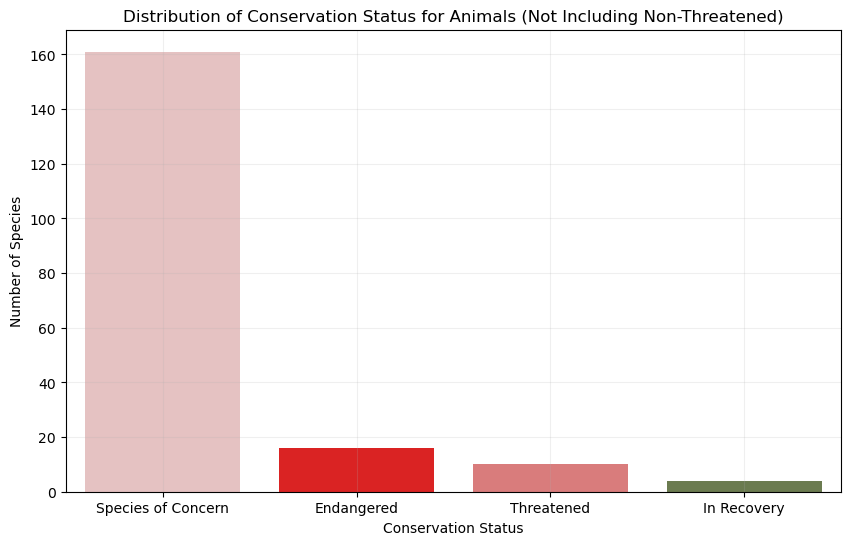

In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare the data
conservation_counts = species_info['conservation_status'].value_counts()

# Set the plot size
plt.figure(figsize=(10, 6))

# Create the bar plot
custom_colors = ['#EBBCBC', '#F80505', '#E86D6D', '#6D8249']
sns.barplot(x=conservation_counts.index, y=conservation_counts.values, palette = custom_colors)


plt.title('Distribution of Conservation Status for Animals (Not Including Non-Threatened)')
plt.xlabel('Conservation Status')
plt.ylabel('Number of Species')
plt.grid(True, linestyle='-', alpha=0.2)
plt.show()

The graph below show that in the 3,3% of threatened species most are species of concern, which means that these are the species that are at a slight risk but don't yet meet the criteria for more severe categories. About 18 species are endangered, which means that these species are at a very high rish of extinction in the near future. About 10 species are threatened and may become endangered in the future. The least amount on species are in recovery, which means that these species have been previously classified as threatened or endangered but have shown improvement.

2. Are certain types of species more likely to be endangered?
   
   To clarify, on the following graph I am again only including the animals in the 3,3% of the dataset who are threatened by extinction. 

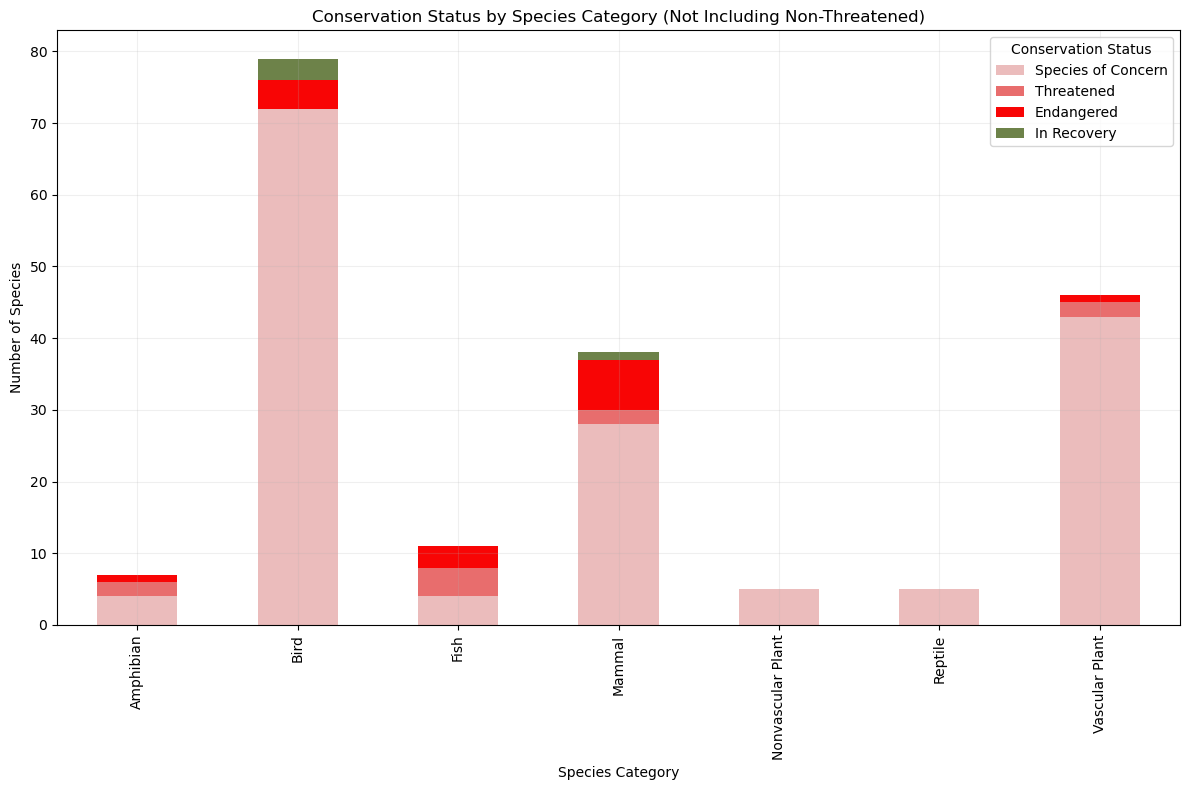

In [103]:
# Create a pivot table including all conservation statuses
pivot_table_all = species_info.pivot_table(index='category', columns='conservation_status', aggfunc='size', fill_value=0)

# Desired order of conservation statuses
desired_order = ["Species of Concern", "Threatened", "Endangered", "In Recovery"]

# Reindex the pivot table to match the desired order
pivot_table_all = pivot_table_all.reindex(columns=desired_order, fill_value=0)

# Plot the stacked bar plot
custom_colors2 = ['#EBBCBC', '#E86D6D', '#F80505', '#6D8249']
pivot_table_all.plot(kind='bar', stacked=True, figsize=(12, 8), color=custom_colors2)

# Add titles and labels
plt.title('Conservation Status by Species Category (Not Including Non-Threatened)')
plt.xlabel('Species Category')
plt.ylabel('Number of Species')
plt.legend(title='Conservation Status')
plt.grid(True, linestyle='-', alpha=0.2)

# Show the plot
plt.tight_layout()
plt.show()

The graph above shows what the graph before it already visualized, but the species have been distributed into categories. We see that most of the endangered animals belong to the Mammal, Bird and Fish category. Also, most species in recovery are birds. Of all the categories, Birds have the most species that are threatened by extinction at some rate, while Reptiles and Nonvascular Plants have the least. 

3. Are the differences between species and their conservation status significant?

Chi-Squared: 53.91636314015659
P-value: 1.8909788349761653e-05
Degrees of Freedom: 18
Expected Frequencies:
[[ 0.58638743  0.14659686  5.90052356  0.36649215]
 [ 6.61780105  1.65445026 66.59162304  4.13612565]
 [ 0.92146597  0.23036649  9.27225131  0.57591623]
 [ 3.18324607  0.79581152 32.03141361  1.9895288 ]
 [ 0.41884817  0.10471204  4.21465969  0.2617801 ]
 [ 0.41884817  0.10471204  4.21465969  0.2617801 ]
 [ 3.85340314  0.96335079 38.77486911  2.40837696]]


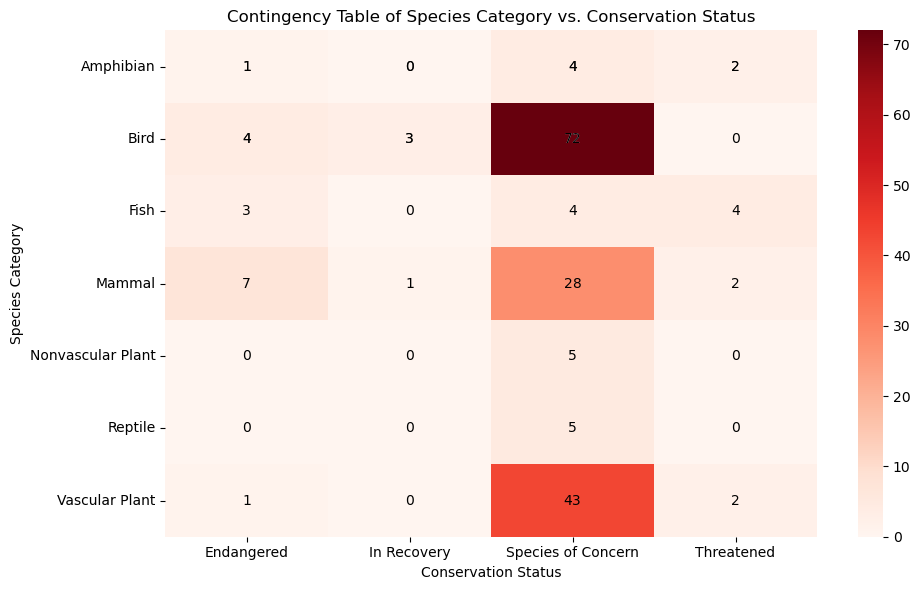

The differences between species categories and their conservation statuses are statistically significant (reject H0).


In [147]:
import scipy.stats as stats

# Create a contingency table
contingency_table = pd.crosstab(species_info['category'], species_info['conservation_status'])

# Perform chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-Squared: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# Plot the contingency table with annotations
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, fmt="d", cmap="Reds", cbar=True)
plt.title('Contingency Table of Species Category vs. Conservation Status')
plt.xlabel('Conservation Status')
plt.ylabel('Species Category')

# Adjusting y-axis to ensure all annotations are visible
plt.yticks(rotation=0)

# Loop through all cells to annotate each cell with its respective count
for i in range(len(contingency_table.index)):
    for j in range(len(contingency_table.columns)):
        plt.text(j + 0.5, i + 0.5, contingency_table.iloc[i, j],
                 ha='center', va='center', color='black', fontsize=10)

plt.tight_layout()
plt.show()

# Interpretation of the p-value
alpha = 0.05
if p < alpha:
    print("The differences between species categories and their conservation statuses are statistically significant (reject H0).")
else:
    print("The differences between species categories and their conservation statuses are not statistically significant (fail to reject H0).")

The contingency table provides a structured overview of the relationship between species categories and their conservation statuses. Each cell in the table shows the frequency of species falling into a specific combination of category and conservation status. 

If we look at the cell where the row is "Mammal" and the column is "Endangered", the number indicates how many mammal species are currently classified as endangered.

The total count in each row shows the distribution of conservation statuses within each species category.
The total count in each column shows the distribution of species categories across each conservation status.

Chi-Squared Value: This statistical measure quantifies the discrepancy between observed and expected frequencies in the contingency table. A higher chi-squared value indicates a larger difference between observed and expected frequencies.

P-value: This indicates the probability of observing such a chi-squared value (or larger) if the null hypothesis (H0) were true. If the p-value is below a chosen significance level (often 0.05), we reject the null hypothesis, indicating that there is a significant association between species categories and conservation statuses.

Based on the chi-squared test results, if the p-value is less than the chosen significance level (e.g., 0.05), we conclude that there is a statistically significant association between species categories and their conservation statuses. This suggests that the differences observed are unlikely to have occurred by chance alone, implying that certain species categories are more likely to have specific conservation statuses than others.

4. Which species were spotted the most at each park?

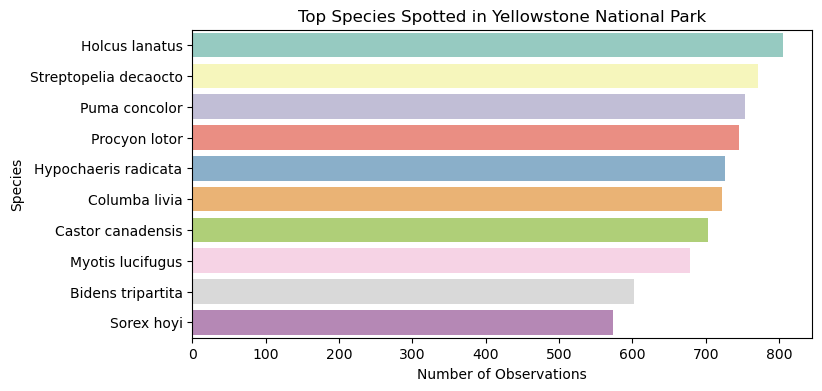

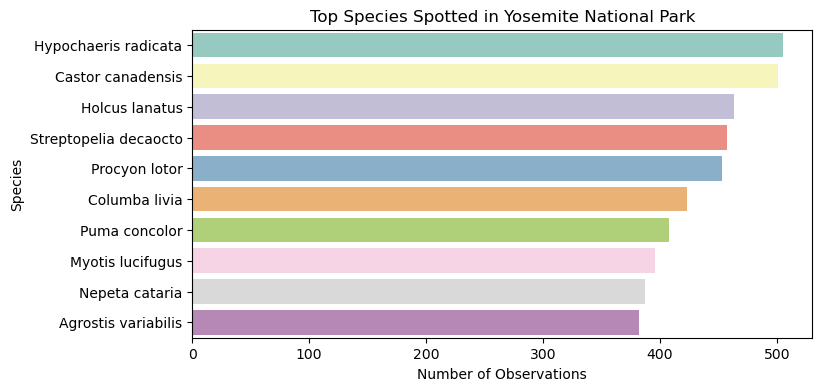

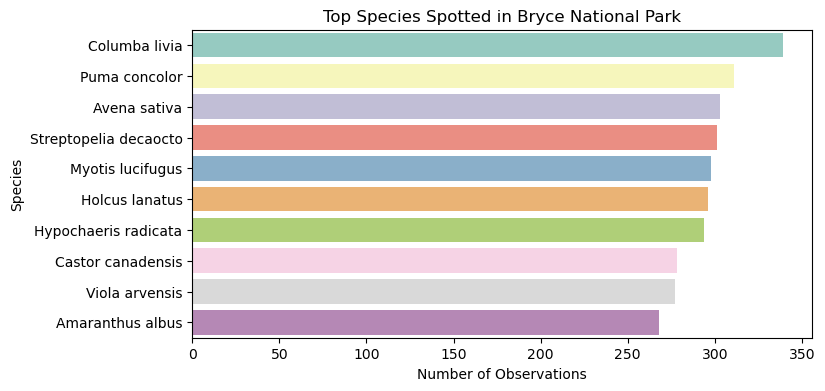

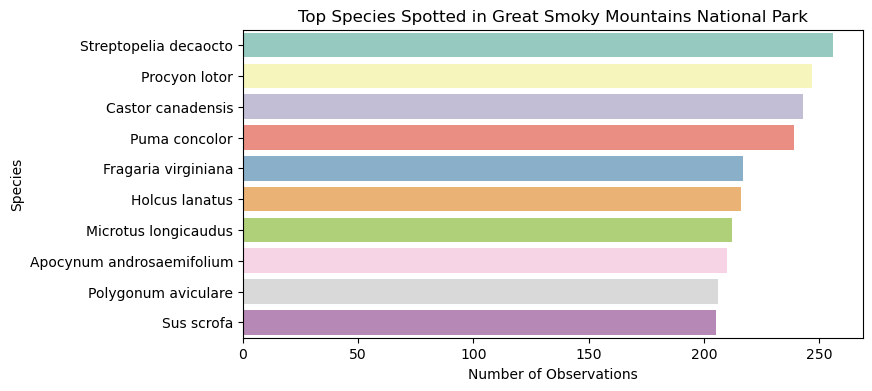

In [150]:
# Group by park_name and scientific_name, then sum the observations
most_spotted = observations.groupby(['park_name', 'scientific_name']).sum().reset_index()
most_spotted = most_spotted.sort_values('observations', ascending=False)

# Get unique park names
parks = most_spotted['park_name'].unique()

# Plot for each park
for park in parks:
    park_data = most_spotted[most_spotted['park_name'] == park].head(10)  # Top 10 species
    plt.figure(figsize=(8, 4))
    sns.barplot(x='observations', y='scientific_name', data=park_data, palette='Set3')
    plt.title(f'Top Species Spotted in {park}')
    plt.xlabel('Number of Observations')
    plt.ylabel('Species')
    plt.show()

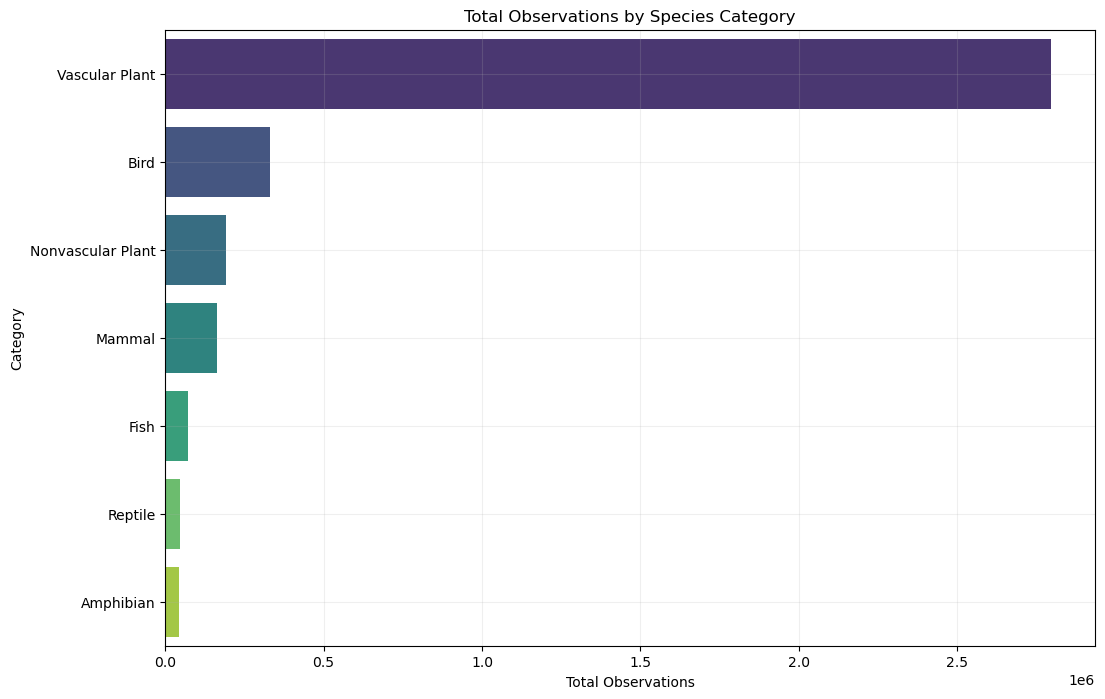

In [128]:
# Merge the DataFrames on the 'scientific_name' column
merged_data = pd.merge(observations, species_info, on='scientific_name')

# Aggregate the observations by species and then by category
category_observations = merged_data.groupby('category')['observations'].sum().reset_index()

# Sort the data by the number of observations
category_observations = category_observations.sort_values('observations', ascending=False)

# Plotting the data
plt.figure(figsize=(12, 8))
sns.barplot(x='observations', y='category', data=category_observations, palette='viridis')
plt.title('Total Observations by Species Category')
plt.xlabel('Total Observations')
plt.ylabel('Category')
plt.grid(True, linestyle='-', alpha=0.2)
plt.show()

Out of all observations, vascular plants were by far most often recorded. 

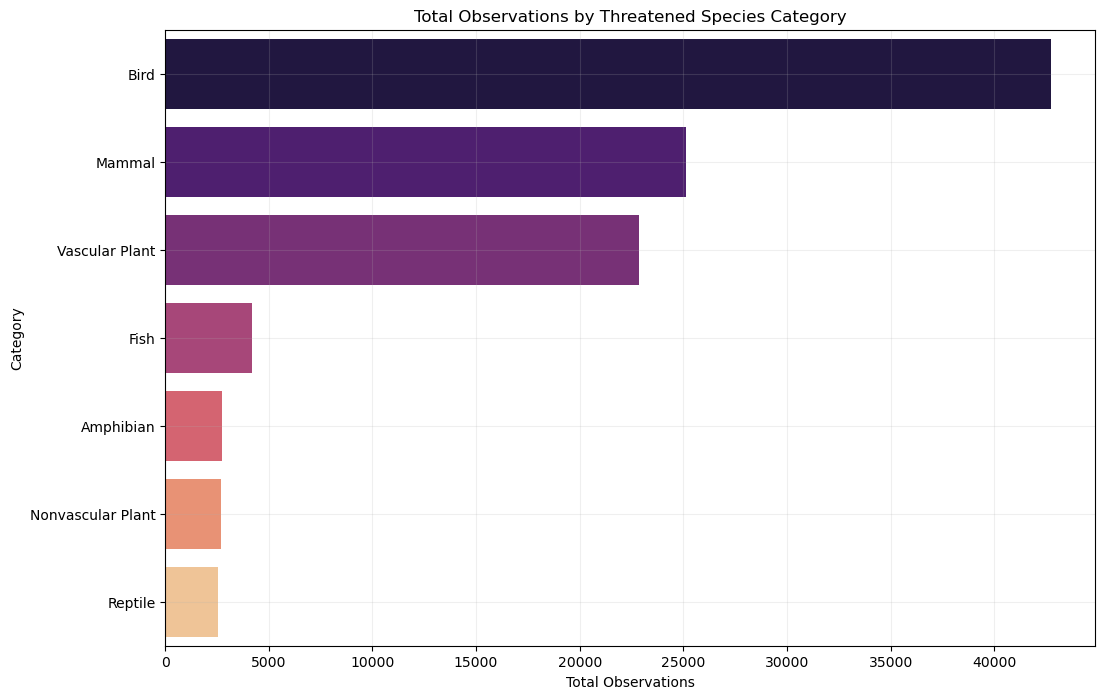

In [130]:
# Merge the DataFrames on the 'scientific_name' column
merged_data = pd.merge(observations, species_info, on='scientific_name')

# Filter for threatened species (those with non-null conservation status)
threatened_data = merged_data[merged_data['conservation_status'].notna()]

# Aggregate the observations by category for all species
category_observations_all = merged_data.groupby('category')['observations'].sum().reset_index()
category_observations_all = category_observations_all.sort_values('observations', ascending=False)

# Aggregate the observations by category for threatened species
category_observations_threatened = threatened_data.groupby('category')['observations'].sum().reset_index()
category_observations_threatened = category_observations_threatened.sort_values('observations', ascending=False)

# Plotting the data for threatened species
plt.figure(figsize=(12, 8))
sns.barplot(x='observations', y='category', data=category_observations_threatened, palette='magma')
plt.title('Total Observations by Threatened Species Category')
plt.xlabel('Total Observations')
plt.ylabel('Category')
plt.grid(True, linestyle='-', alpha=0.2)
plt.show()


Interestingly, out of all threatened species, birds were observed the most. Mammals and vascular plants are next. This makes a lot of sense because the number of threatened species in each category corresponds to it. 

Conclusion

In this data 3.28% of the species are classified as threatened, while 96.72% are non-threatened. Among the threatened species, most are classified as "species of concern," indicating they are at a slight risk but don't yet meet the criteria for more severe categories. About 18 species are endangered, meaning they face a very high risk of extinction in the near future. Approximately 10 species are threatened and may become endangered in the future. The smallest group consists of species in recovery, which have shown improvement after being previously classified as threatened or endangered.

The analysis also shows that most endangered animals belong to the Mammal, Bird, and Fish categories. Birds, in particular, have the most species that are threatened by extinction at some level, while Reptiles and Nonvascular Plants have the least. Furthermore, most species in recovery are birds. This distribution highlights the varying degrees of vulnerability across different species categories.

The chi-squared test results support the conclusion that the differences between species categories and their conservation statuses are statistically significant (p-value < 0.05). This means that certain species categories are more likely to have specific conservation statuses than others, and these differences are unlikely to have occurred by chance alone.

Interestingly, vascular plants were the most frequently recorded species in our observations. Among the threatened species, birds were observed the most, followed by mammals and vascular plants. This makes sense given the number of threatened species within each category, suggesting that the visibility and recording frequency of these species align with their conservation statuses.